# Import necessary libraries  

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import logging 
logging.basicConfig(level = logging.INFO, filename = 'app.log', filemode = 'w', format = '%(asctime)s - %(levelname)s - %(message)s')

# read the dataset

In [2]:
df = pd.read_csv(r"E:\Internship project\UCI_Credit_Card.csv")

In [3]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

 categorical columns which are encoded  below
    
    MARRIAGE: Marital status

    1 = married
    2 = single
    3 = others
    
    SEX: Gender

    1 = Male    
    2 = Female

    EDUCATION:

    1 = graduate school     
    2 = university     
    3 = high school     
    4 = others     
    5 = unknown     
    6 = unknown
    
    PAY_1,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)

    -2= no credit to pay
    -1= pay duly
    0= minimum payment is met
    1 = payment delay for one month
    2 = payment delay for two months
    ... 
    8 = payment delay for eight months
    9 = payment delay for nine months and above

# Explore the data

In [4]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [5]:
df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [6]:
df.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

by checking for null values of columns we get to know there aren't any null values

In [8]:
df.corr()

ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.023581   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.018749   
BILL_AMT3                   0.024354   0.283236 -0.024563   0.013002   
BILL_AMT4                   0.040351   0.293988 -0.021880  -0.000451   
BILL_AMT5                   0.016705   0.295562 -0.017005  -0.007567   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.009099   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.037456   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.030038   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.039943   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.038218   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.040358   
PAY_AMT6                    0.003000   0.219595 -0.002766  -0.037200   
default.payment.next.month -0.013952  -0.153520 -0.039961   0.028006   

                            MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
ID                         -0.029079  0.018678 -0.030575 -0.011215 -0.018494   
LIMIT_BAL                  -0.108139  0.144713 -0.271214 -0.296382 -0.286123   
SEX                        -0.031389 -0.090874 -0.057643 -0.070771 -0.066096   
EDUCATION                  -0.143464  0.175061  0.105364  0.121566  0.114025   
MARRIAGE                    1.000000 -0.414170  0.019917  0.024199  0.032688   
AGE                        -0.414170  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0                       0.019917 -0.039447  1.000000  0.672164  0.574245   
PAY_2                       0.024199 -0.050148  0.672164  1.000000  0.766552   
PAY_3                       0.032688 -0.053048  0.574245  0.766552  1.000000   
PAY_4                       0.033122 -0.049722  0.538841  0.662067  0.777359   
PAY_5                       0.035629 -0.053826  0.509426  0.622780  0.686775   
PAY_6                       0.034345 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1                  -0.023472  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2                  -0.021602  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3                  -0.024909  0.053710  0.179785  0.224146  0.227494   
BILL_AMT4                  -0.023344  0.051353  0.179125  0.222237  0.227202   
BILL_AMT5                  -0.025393  0.049345  0.180635  0.221348  0.225145   
BILL_AMT6                  -0.021207  0.047613  0.176980  0.219403  0.222327   
PAY_AMT1                   -0.005979  0.026147 -0.079269 -0.080701  0.001295   
PAY_AMT2                   -0.008093  0.021785 -0.070101 -0.058990 -0.066793   
PAY_AMT3                   -0.003541  0.029247 -0.070561 -0.055901 -0.053311   
PAY_AMT4                   -0.012659  0.021379 -0.064005 -0.046858 -0.046067   
PAY_AMT5                   -0.001205  0.022850 -0.058190 -0.037093 -0.035863   
PAY_AMT6                   -0.006641  0.019478 -0.058673 -0.036500 -0.035861   
default.payment.next.month -0.024339  0.013890  0.324794  0.263551  0.235253   

                               PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [11]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [12]:
df.rename(columns={"PAY_0":"PAY_1",'default.payment.next.month':'default_status'},inplace=True)

In [13]:
categorical_features=[i for i in df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6']]]

# Univariate Analysis

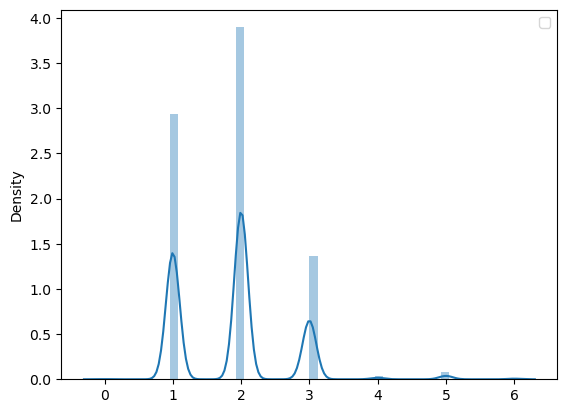

In [14]:
sns.distplot(x=df['EDUCATION'],kde=True)
plt.legend()

- By the distplot we can see most are university grads
- Least belongs to others category

<AxesSubplot:ylabel='Density'>

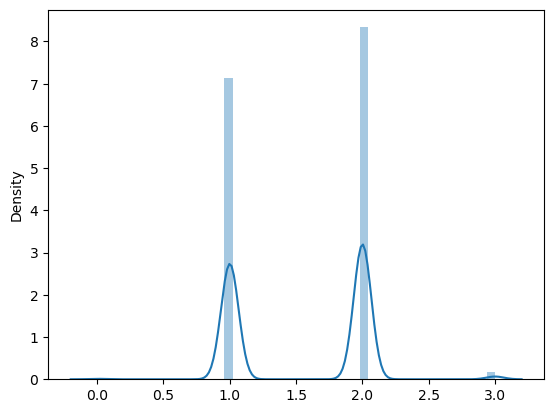

In [15]:
sns.distplot(x=df['MARRIAGE'])

- Most of them are unmarried
- Least count is others category 
- Married category is nominally lesser than unmarried, lying between other two category

Text(0.5, 1.0, 'distribution of limit balance')

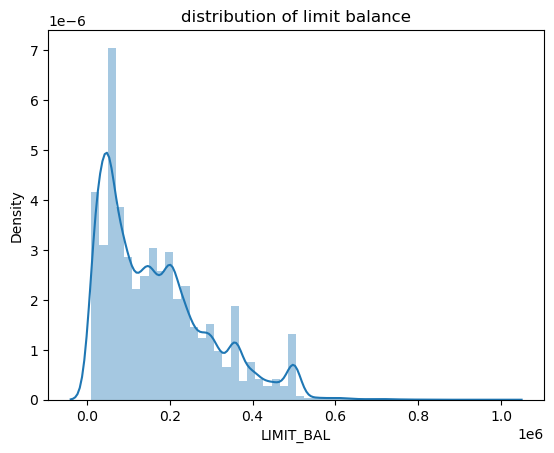

In [16]:
sns.distplot(df['LIMIT_BAL'],kde=True)
plt.title('distribution of limit balance')

- Limit Balance count gradually decreases 
- the curve is right skewed 
- highest value goes till count of 7

# Bivariate Analysis

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

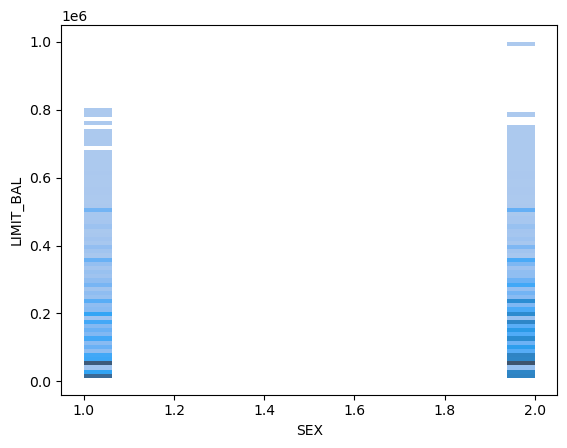

In [17]:
sns.histplot(x=df['SEX'], y=df['LIMIT_BAL'])

- By the analysis we can assume that females have more credit balance 
- Men have compareitevly less 

Text(0.5, 1.0, 'defaulters based on gender')

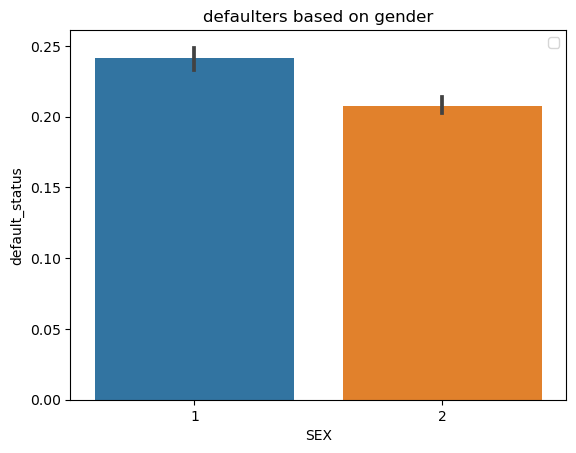

In [18]:
sns.barplot(x=df['SEX'],y=df['default_status'])
plt.legend()
plt.title("defaulters based on gender")


- By the above Analysis we get to know that most defaulters are Male 
- Lesser defaulters are females 

# We check for outliers and proceed further 

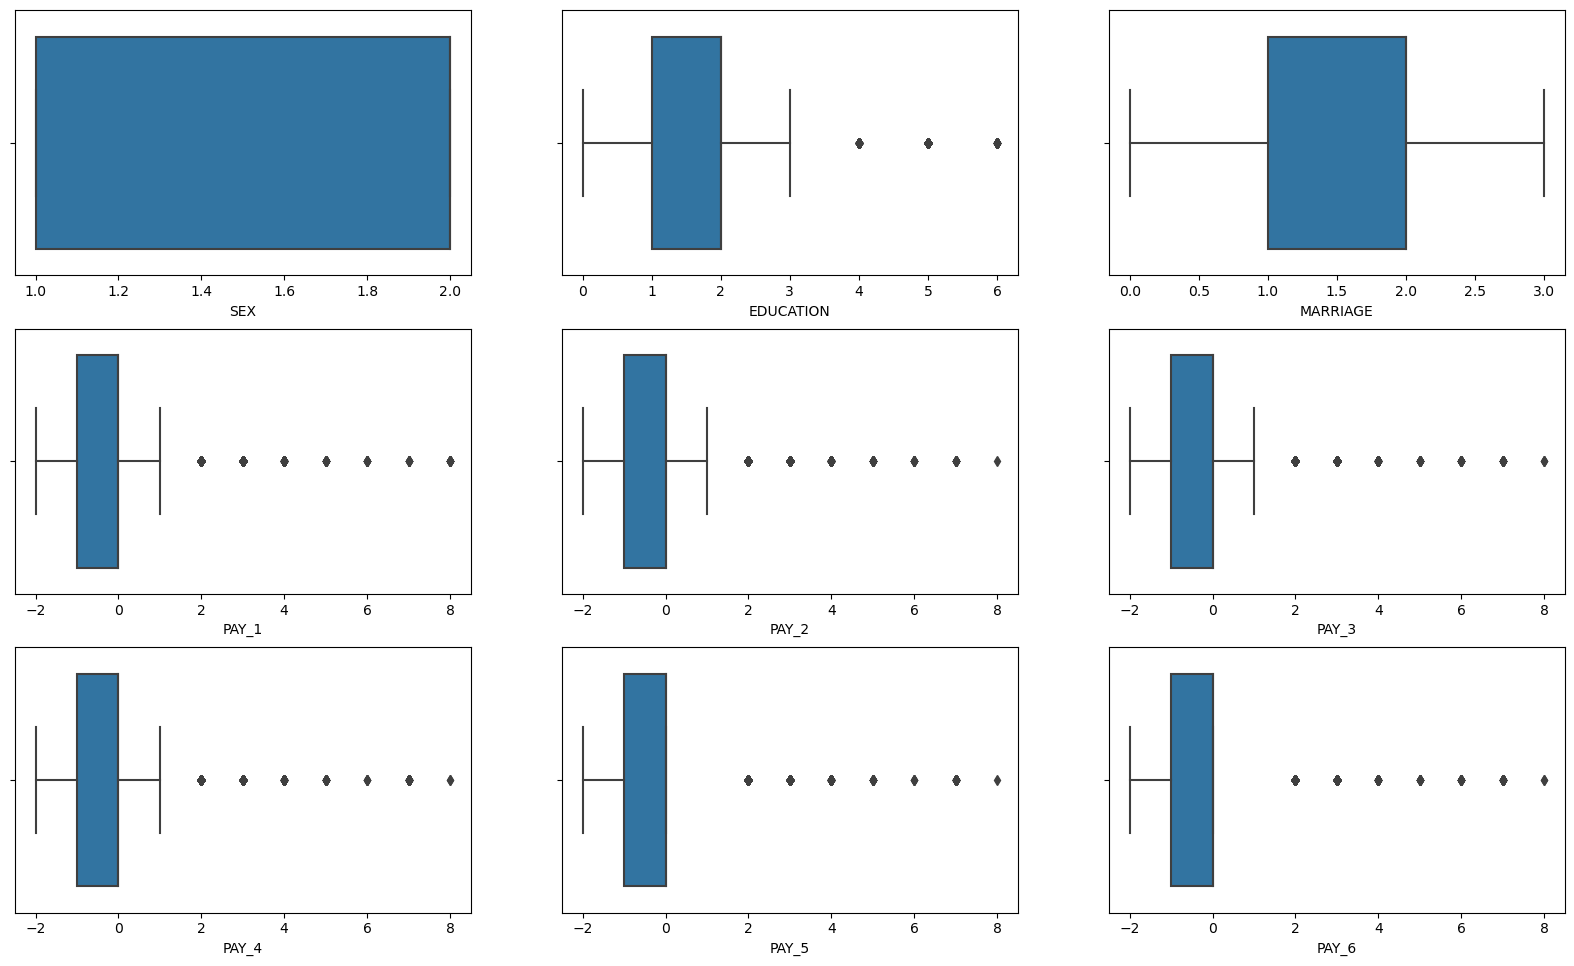

In [19]:
plt.figure(figsize=(20,20))
for i in enumerate(categorical_features):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot( i[1], data=df)


- Apart from Sex and Marriage every column has outliers
- from Pay_1 till Pay_6 we have much outliers
- comparitively Education has lesser ourliers 
- Note: outliers affect some Machine learning models 

In [20]:
#we can remove zscore using zscore 
# df['education'] = (df.EDUCATION - df.EDUCATION.mean()) / df.EDUCATION.std()
# df['pay1'] = (df.PAY_1 - df.PAY_1.mean()) / df.PAY_1.std()
# df['pay2'] = (df.PAY_2 - df.PAY_2.mean()) / df.PAY_2.std()
# df['pay3'] = (df.PAY_3 - df.PAY_3.mean()) / df.PAY_3.std()
# df['pay4'] = (df.PAY_4 - df.PAY_4.mean()) / df.PAY_4.std()
# df['pay5'] = (df.PAY_5 - df.PAY_5.mean()) / df.PAY_5.std()
# df['pay6'] = (df.PAY_6 - df.PAY_6.mean()) / df.PAY_6.std()

#We are not removing any outliers since we use algorithms such as Decision tree, random forest and xgboost and gradient boostwhich isnt affected by outliers

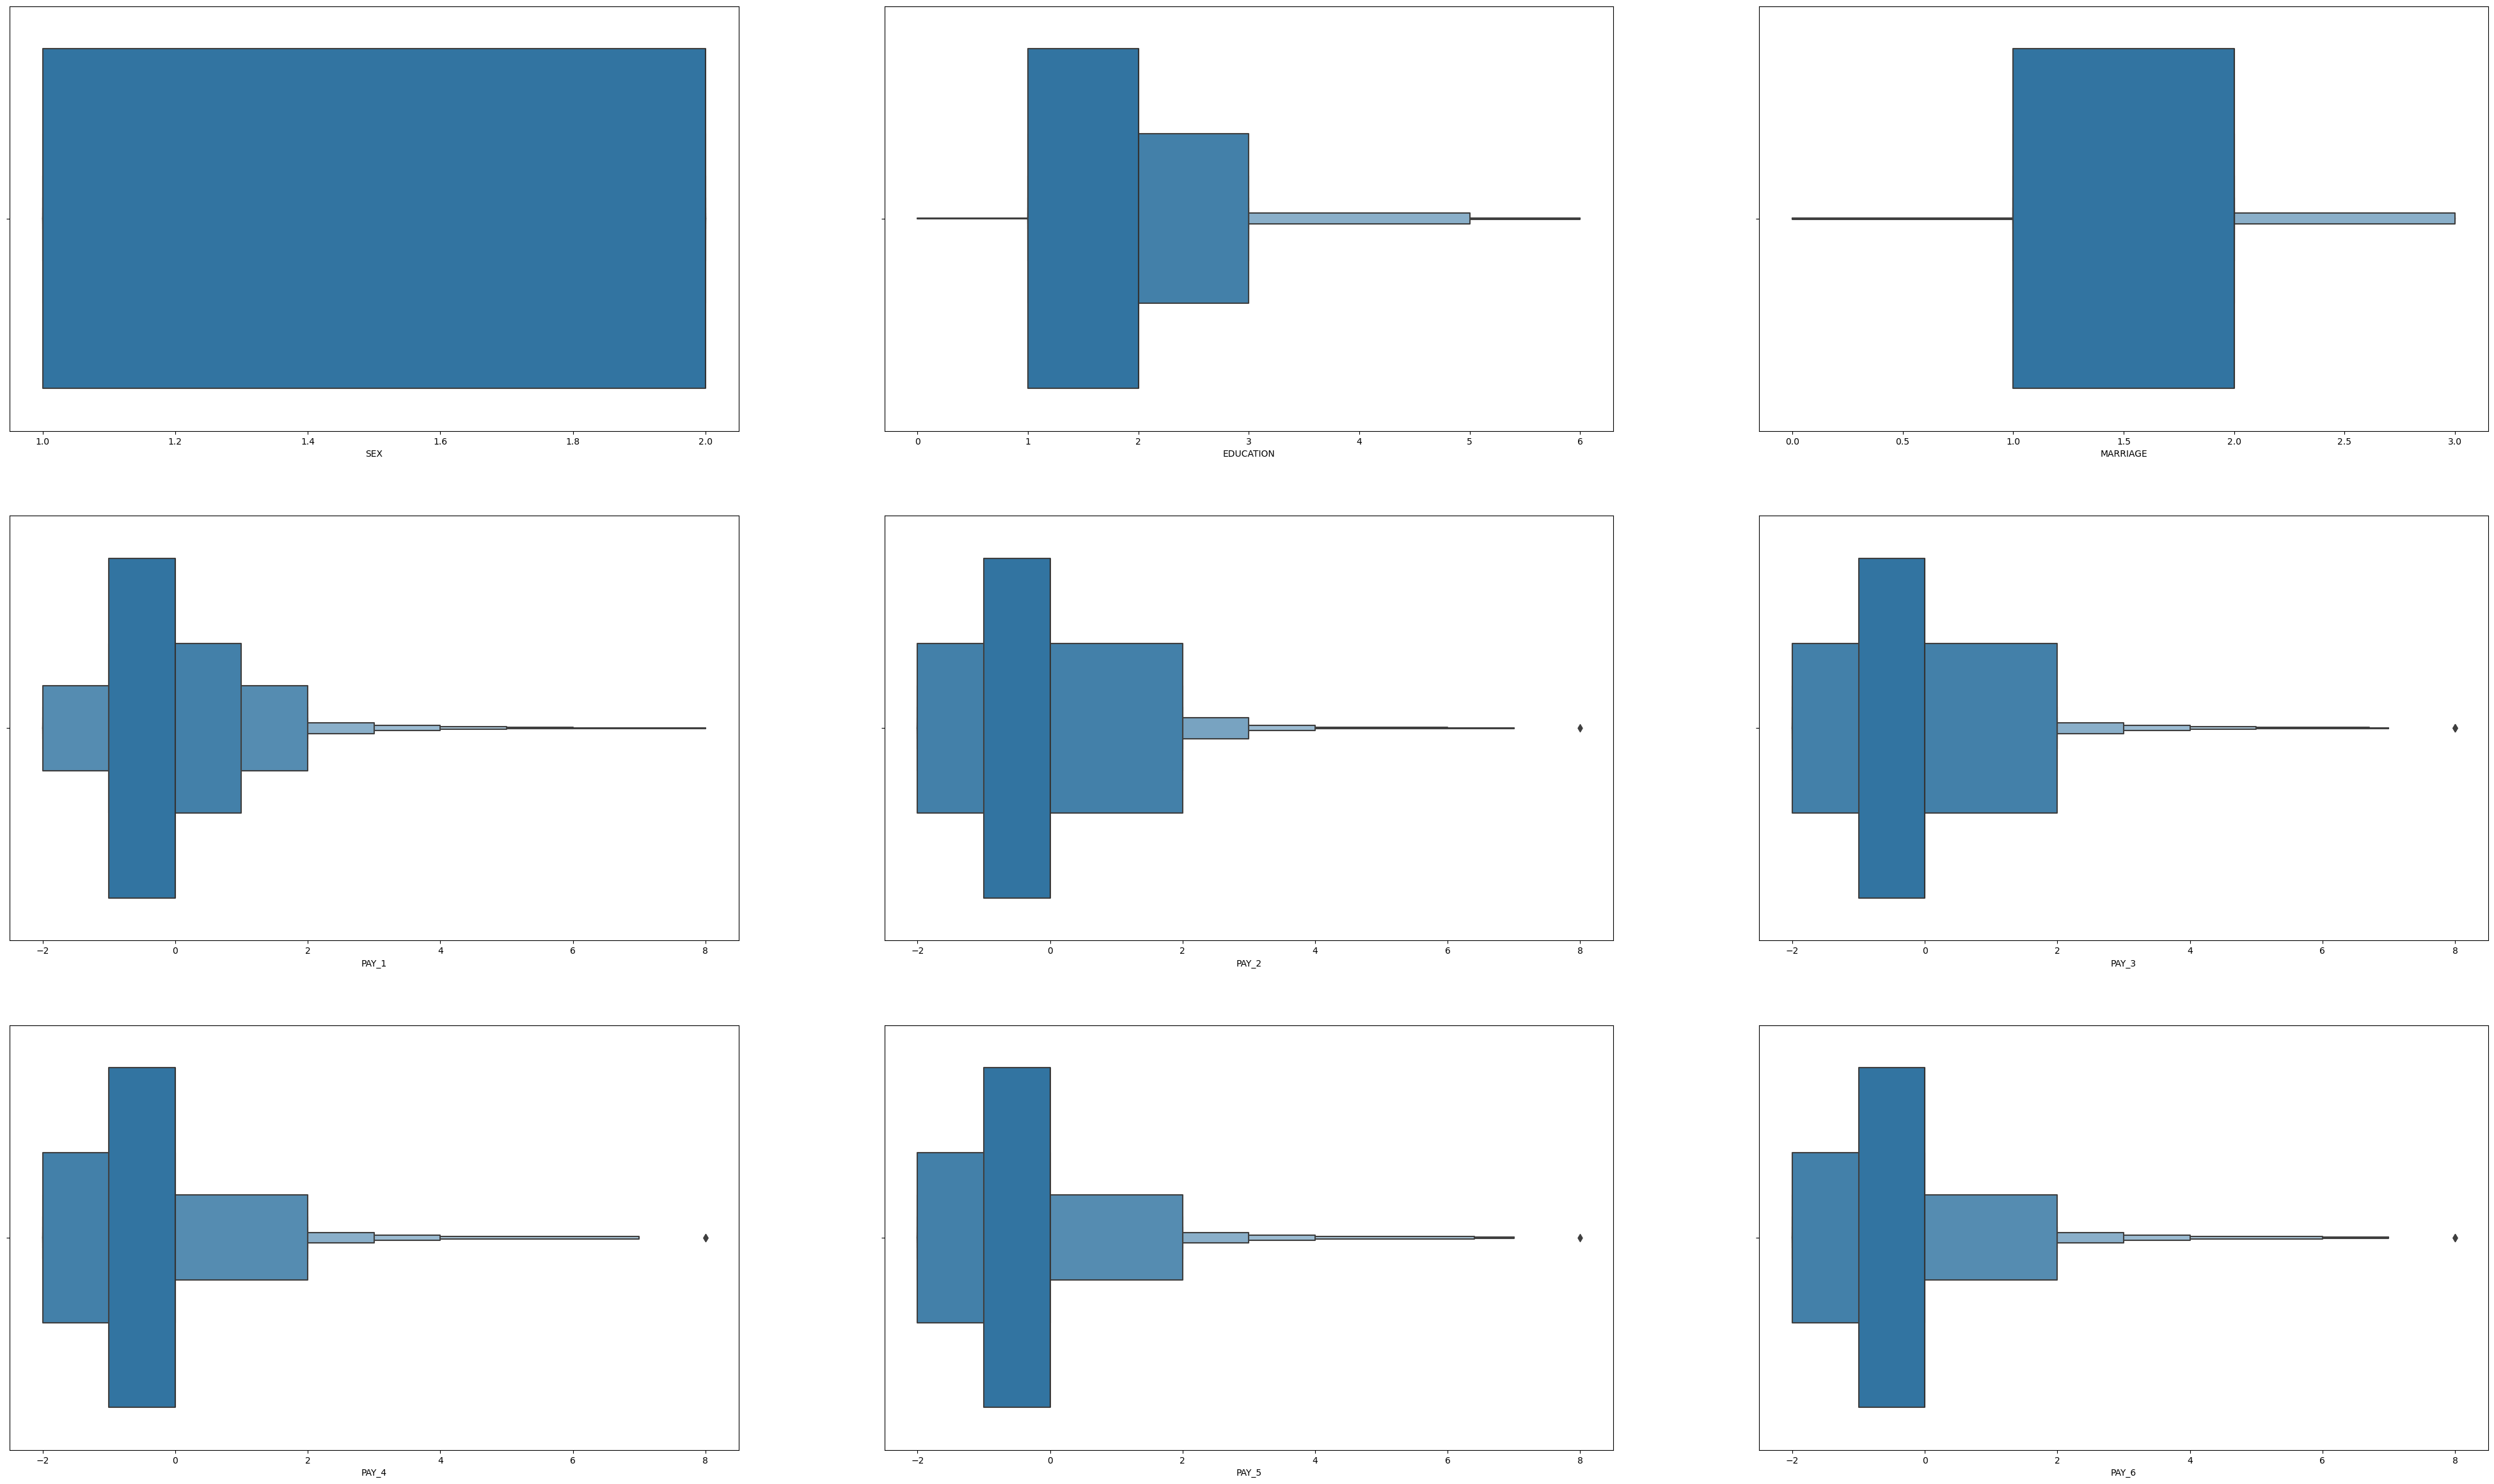

In [21]:
plt.figure(figsize=(50,50))
for i in enumerate(categorical_features):
    plt.subplot(5,3,i[0]+1)
    sns.boxenplot( i[1], data=df,hue='AGE')


- Boxen plot is just like box plots which shows the accurate quantiles

<AxesSubplot:xlabel='PAY_6', ylabel='AGE'>

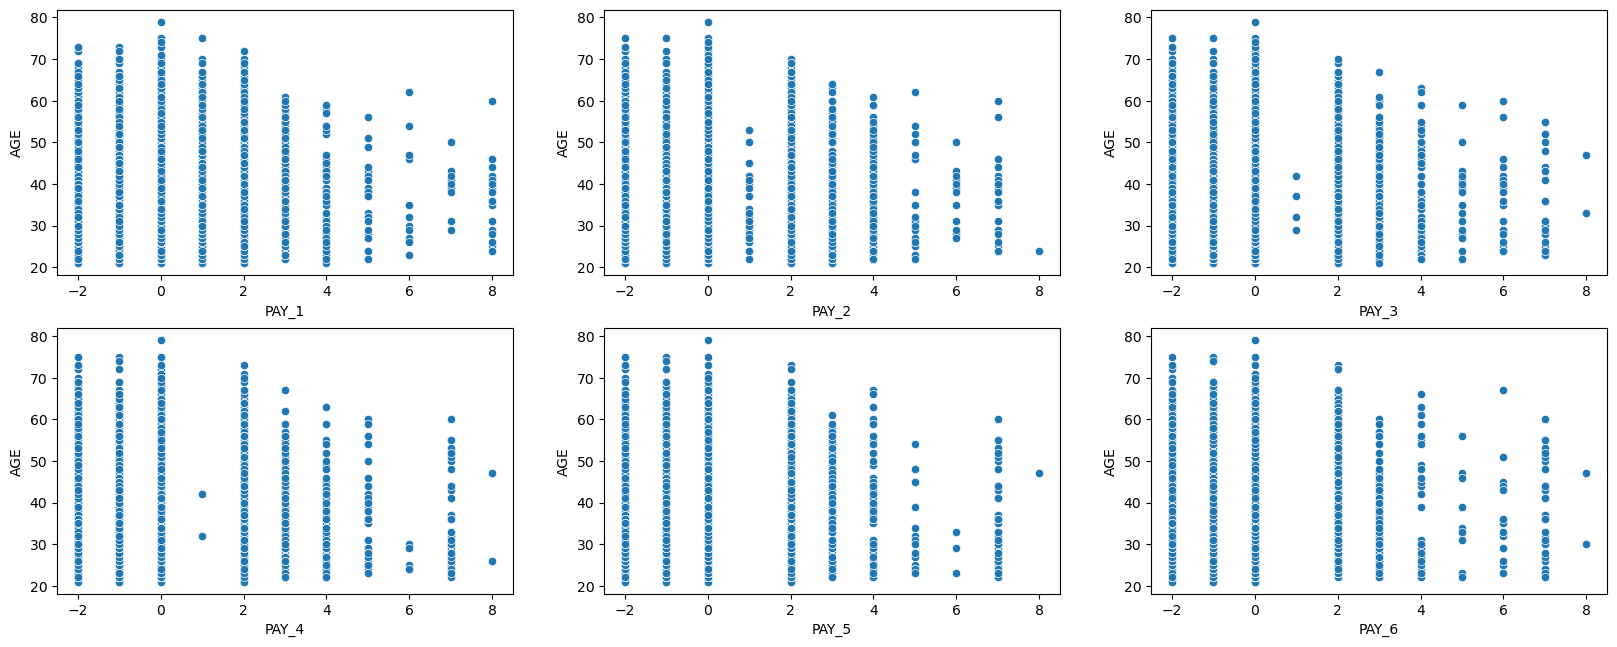

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
sns.scatterplot(data=df,x=df["PAY_1"],y=df["AGE"])
plt.subplot(5,3,2)
sns.scatterplot(data=df,x=df["PAY_2"],y=df["AGE"])
plt.subplot(5,3,3)
sns.scatterplot(data=df,x=df["PAY_3"],y=df["AGE"])
plt.subplot(5,3,4)
sns.scatterplot(data=df,x=df["PAY_4"],y=df["AGE"])
plt.subplot(5,3,5)
sns.scatterplot(data=df,x=df["PAY_5"],y=df["AGE"])
plt.subplot(5,3,6)
sns.scatterplot(data=df,x=df["PAY_6"],y=df["AGE"])

- Looking at the graph properly, we can observe every age group with any pay i.e, 1 to 6 has highest under 0 value of X axis 
- least is coming at 8
- This means the card holders most of them are paying on time or minimum limit is met
- Some have exceptions at 6th value where they might have delayed their payment 

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='PAY_AMT6'>

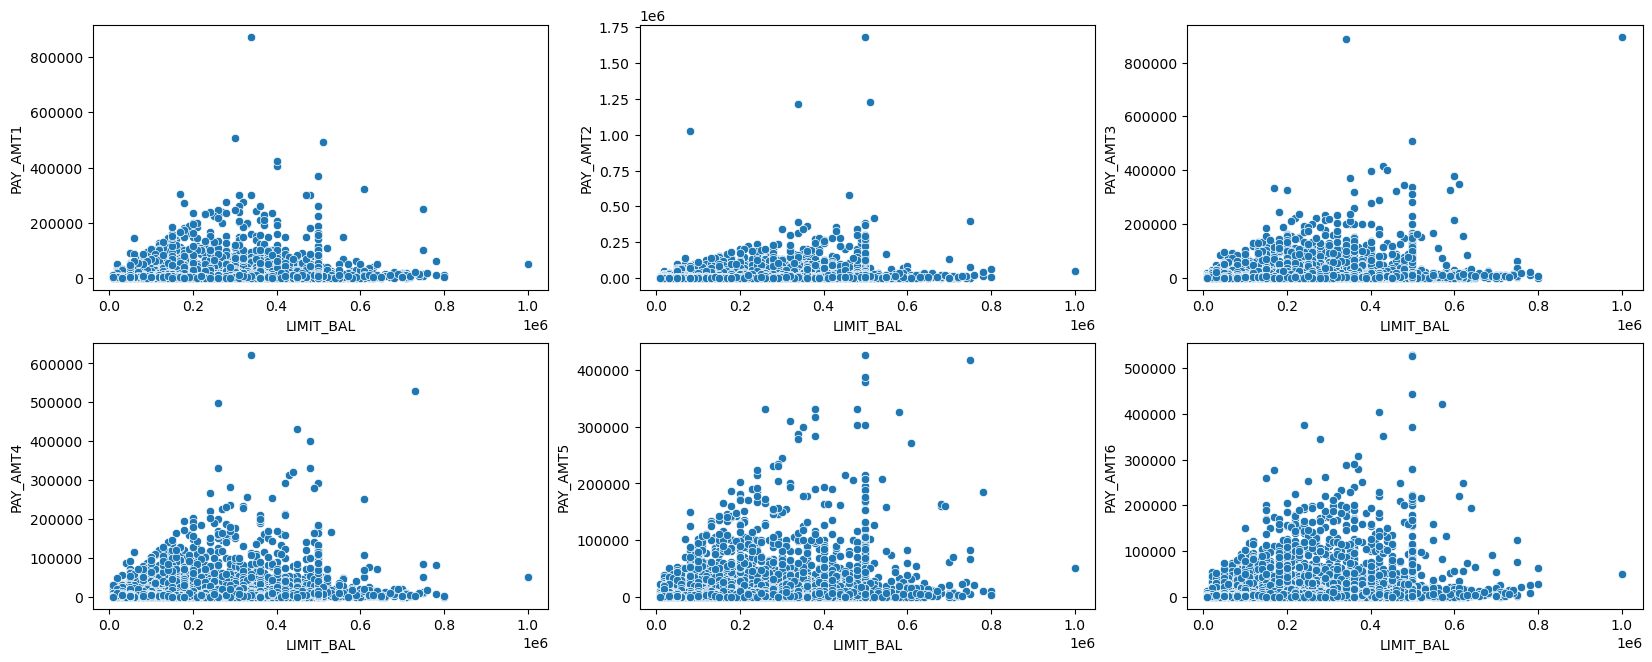

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
sns.scatterplot(data=df,x=df["LIMIT_BAL"],y=df["PAY_AMT1"])
plt.subplot(5,3,2)
sns.scatterplot(data=df,x=df["LIMIT_BAL"],y=df["PAY_AMT2"])
plt.subplot(5,3,3)
sns.scatterplot(data=df,x=df["LIMIT_BAL"],y=df["PAY_AMT3"])
plt.subplot(5,3,4)
sns.scatterplot(data=df,x=df["LIMIT_BAL"],y=df["PAY_AMT4"])
plt.subplot(5,3,5)
sns.scatterplot(data=df,x=df["LIMIT_BAL"],y=df["PAY_AMT5"])
plt.subplot(5,3,6)
sns.scatterplot(data=df,x=df["LIMIT_BAL"],y=df["PAY_AMT6"])

- PAY_AMT 1,2,3 have a slight or no distribution at all
- PAY_AMT 4,5,6 have kindly a normal distribution

<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

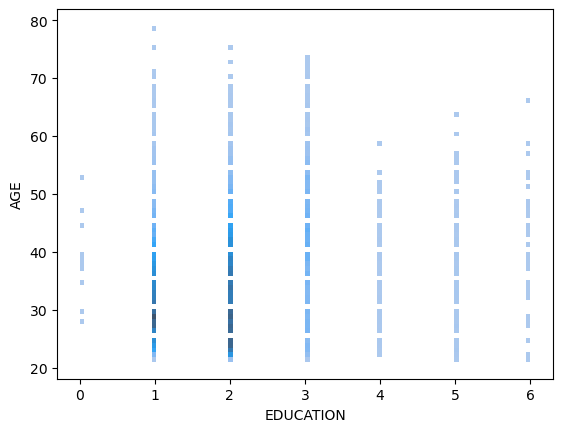

In [24]:
sns.histplot(x=df['EDUCATION'],y=df["AGE"])

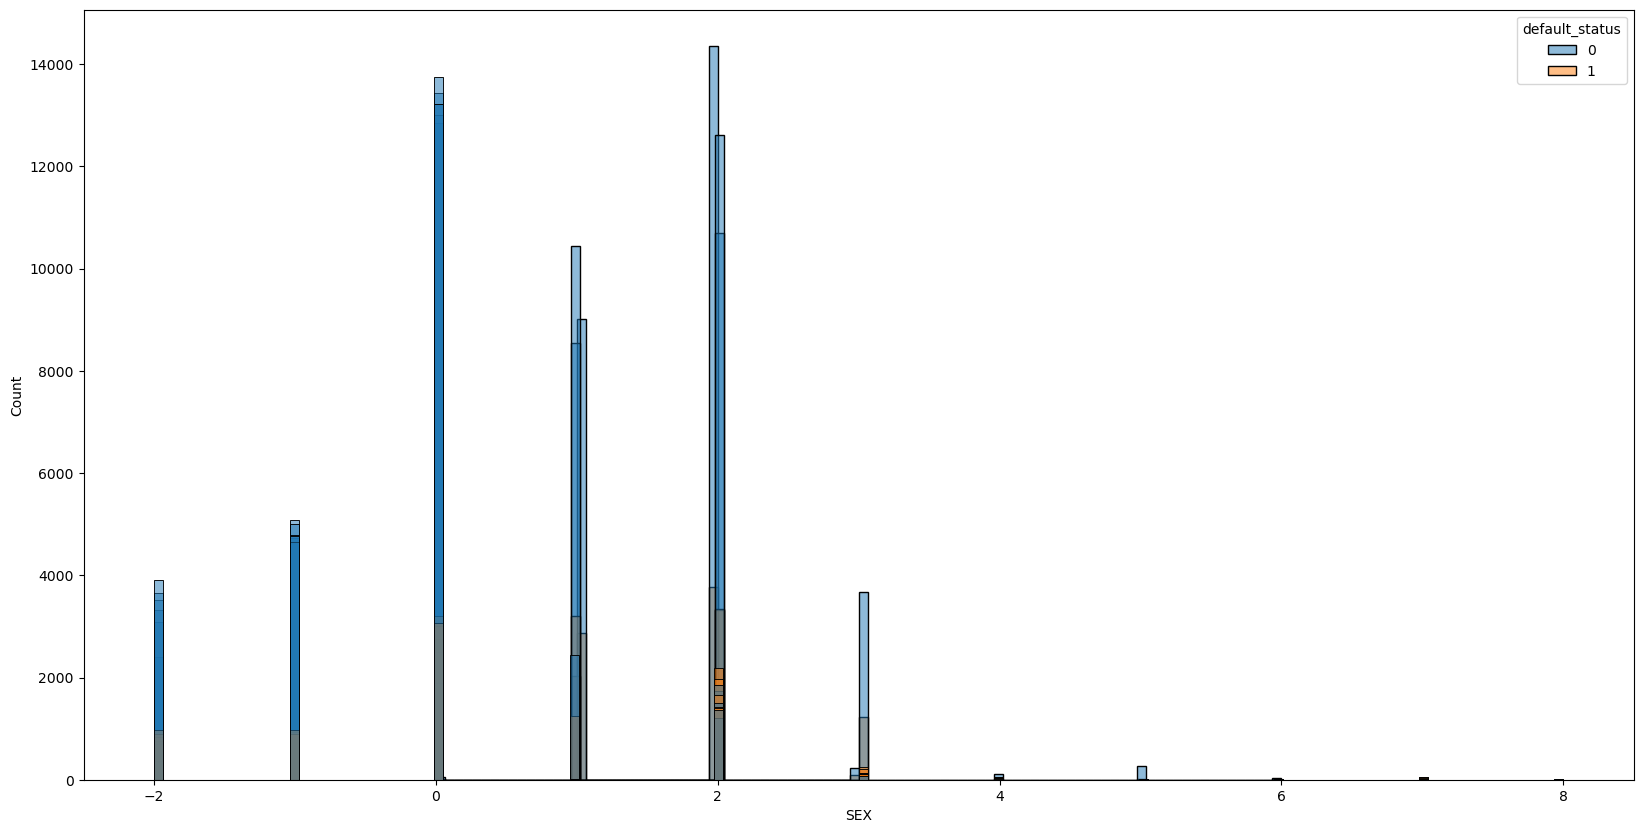

In [25]:
plt.figure(figsize=(20,10))
for i in range(len(categorical_features)):
    sns.histplot(x=df[categorical_features[i]],hue=df["default_status"],legend=True, stat='count')

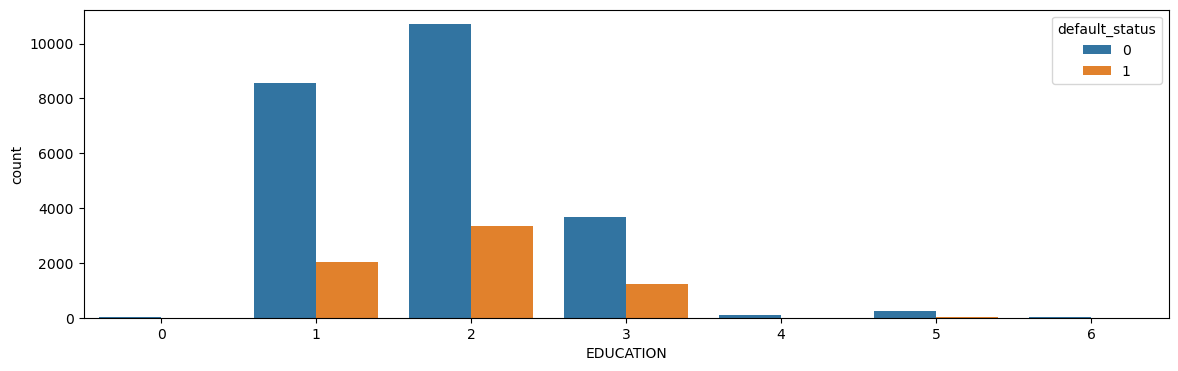

In [26]:
plt.figure(figsize=(14,4))
ax=sns.countplot("EDUCATION",data=df,hue='default_status')

- Most of the people lie in university education category
- Next comes people lying under grad school category
- least comes under others and unknown

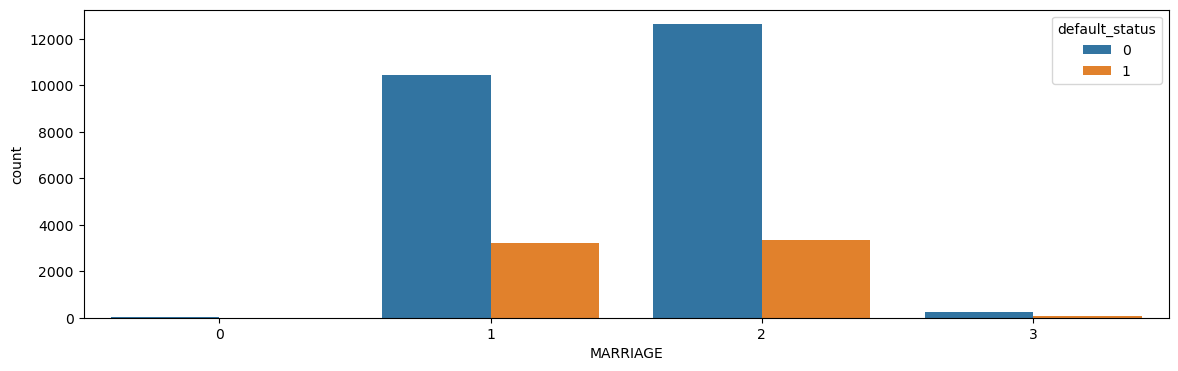

In [27]:
plt.figure(figsize=(14,4))
ax=sns.countplot("MARRIAGE",data=df,hue='default_status')

- Most people lie under unmarried
- Next comes maximum under married
- Least comes under others and count of default status is negligible 

# Multivariate Analysis

<AxesSubplot:>

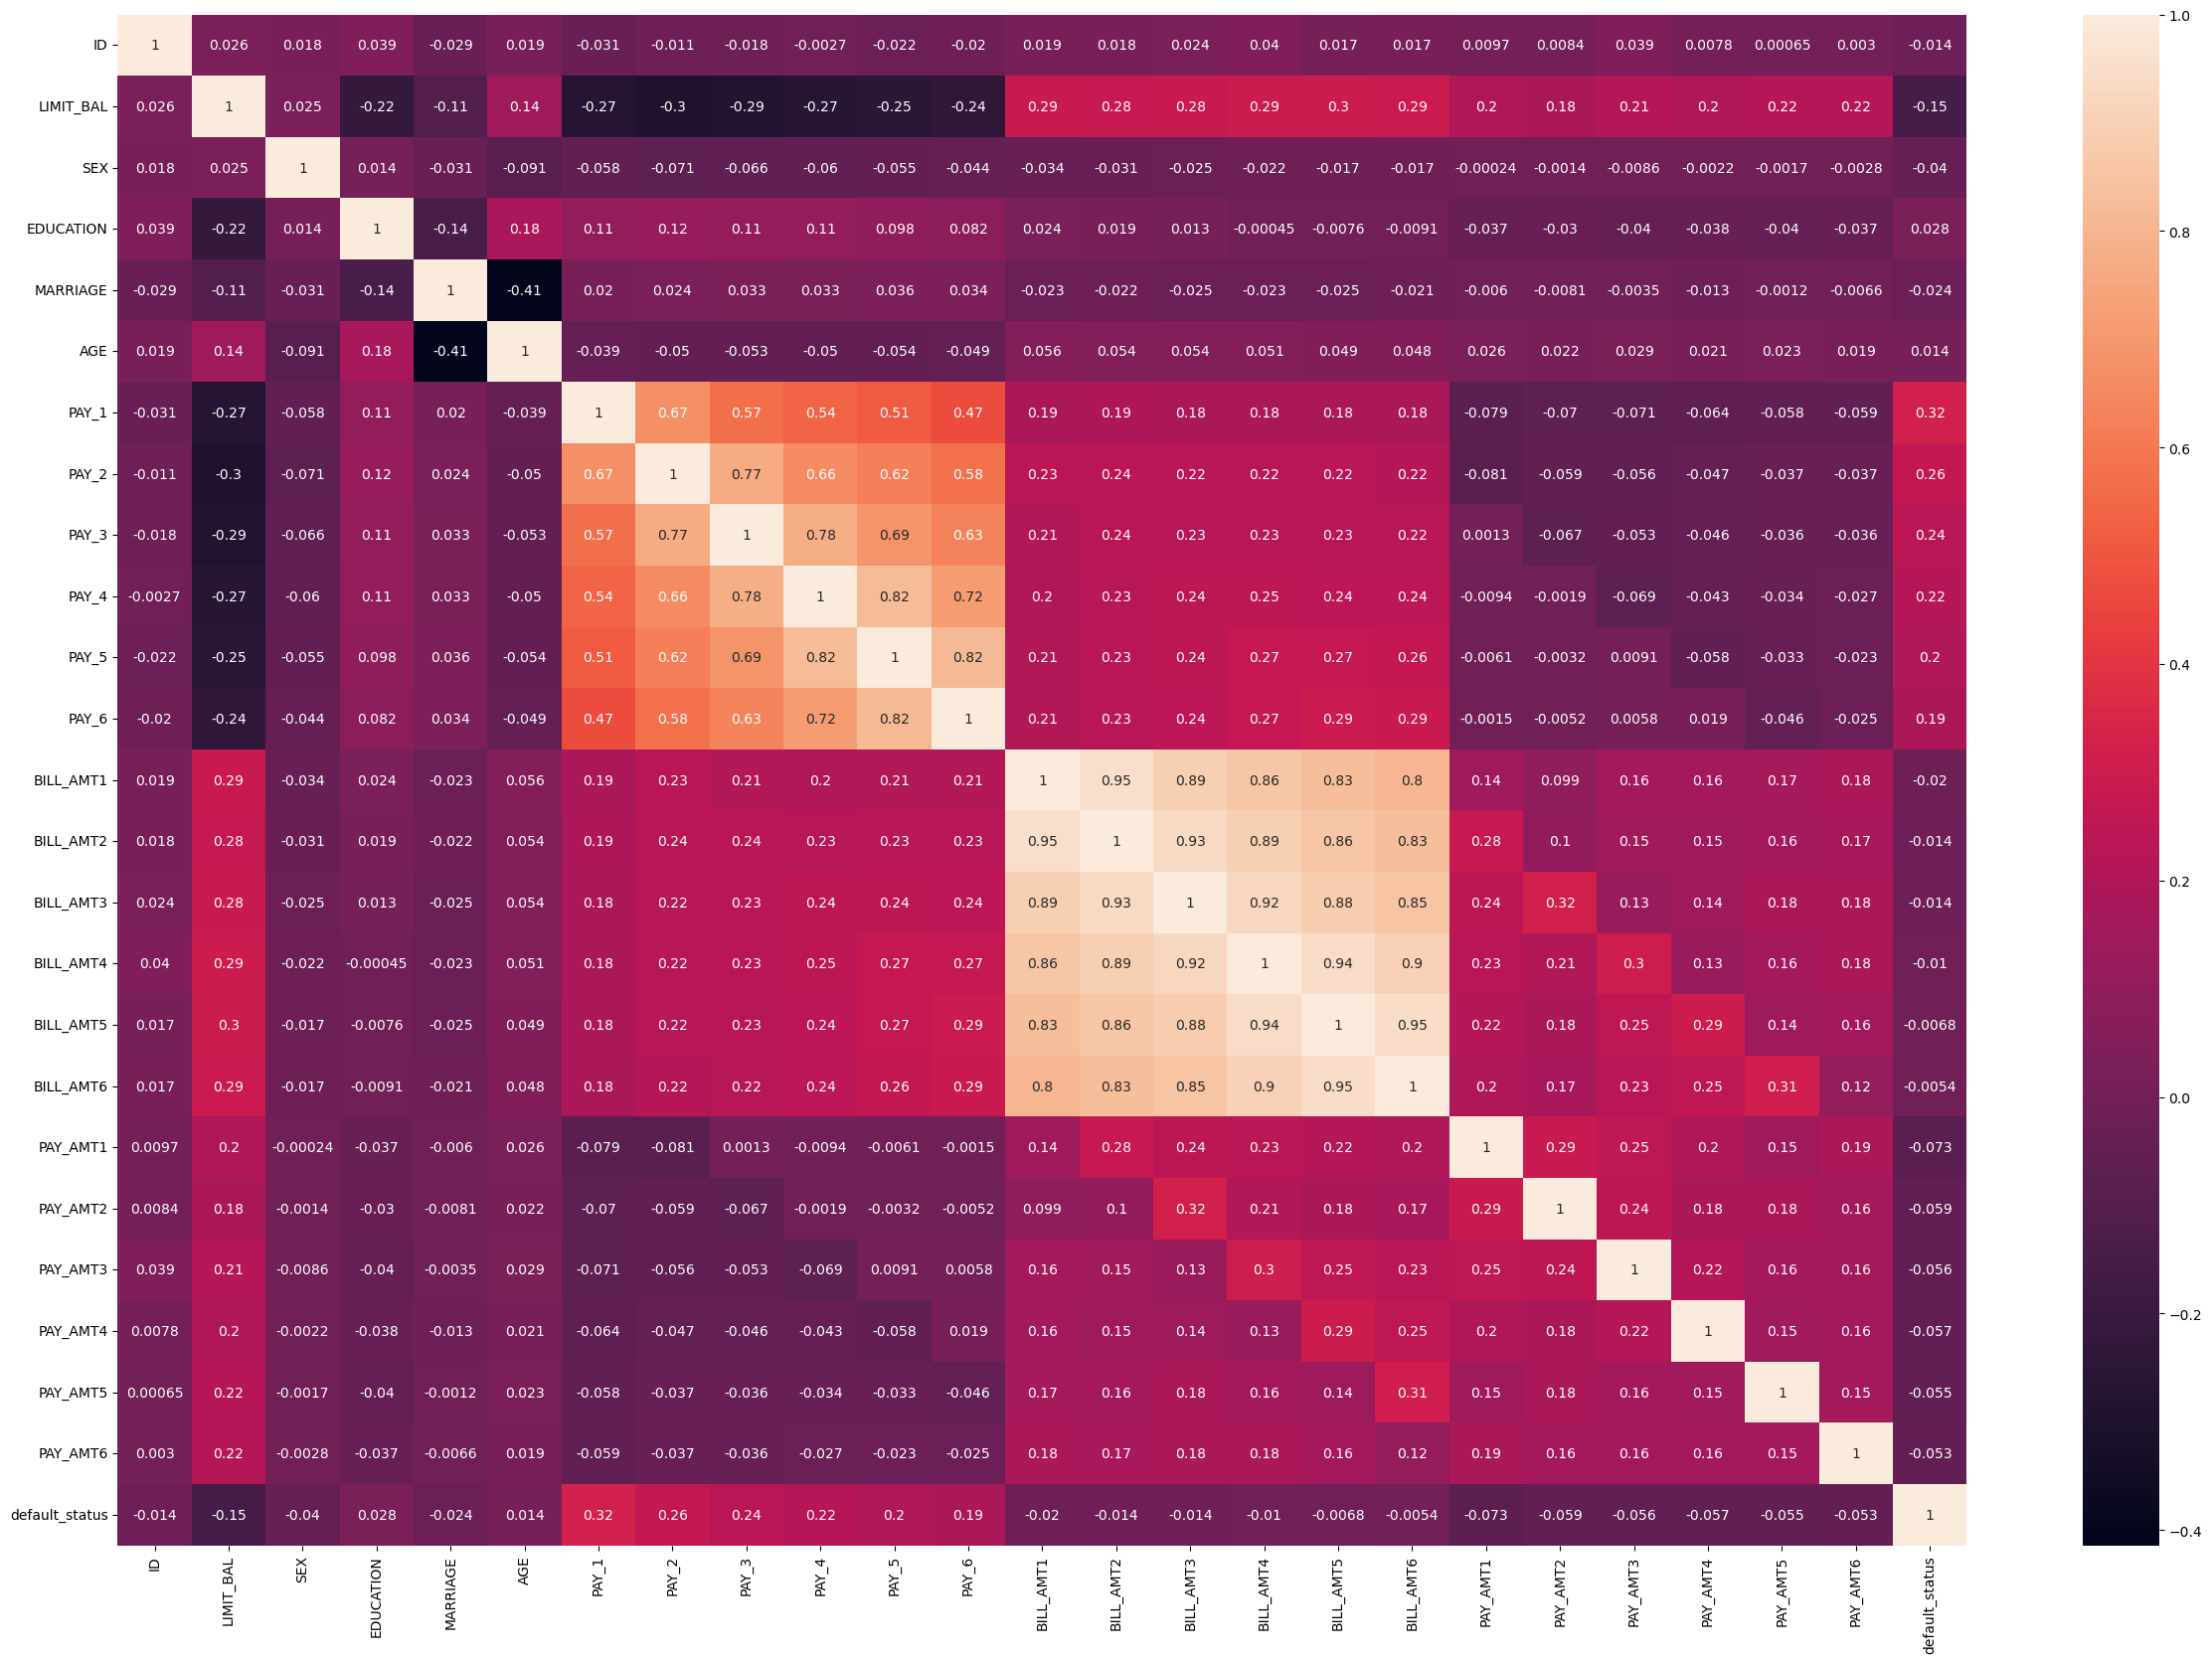

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr(),annot=True)

<Figure size 3000x3000 with 0 Axes>

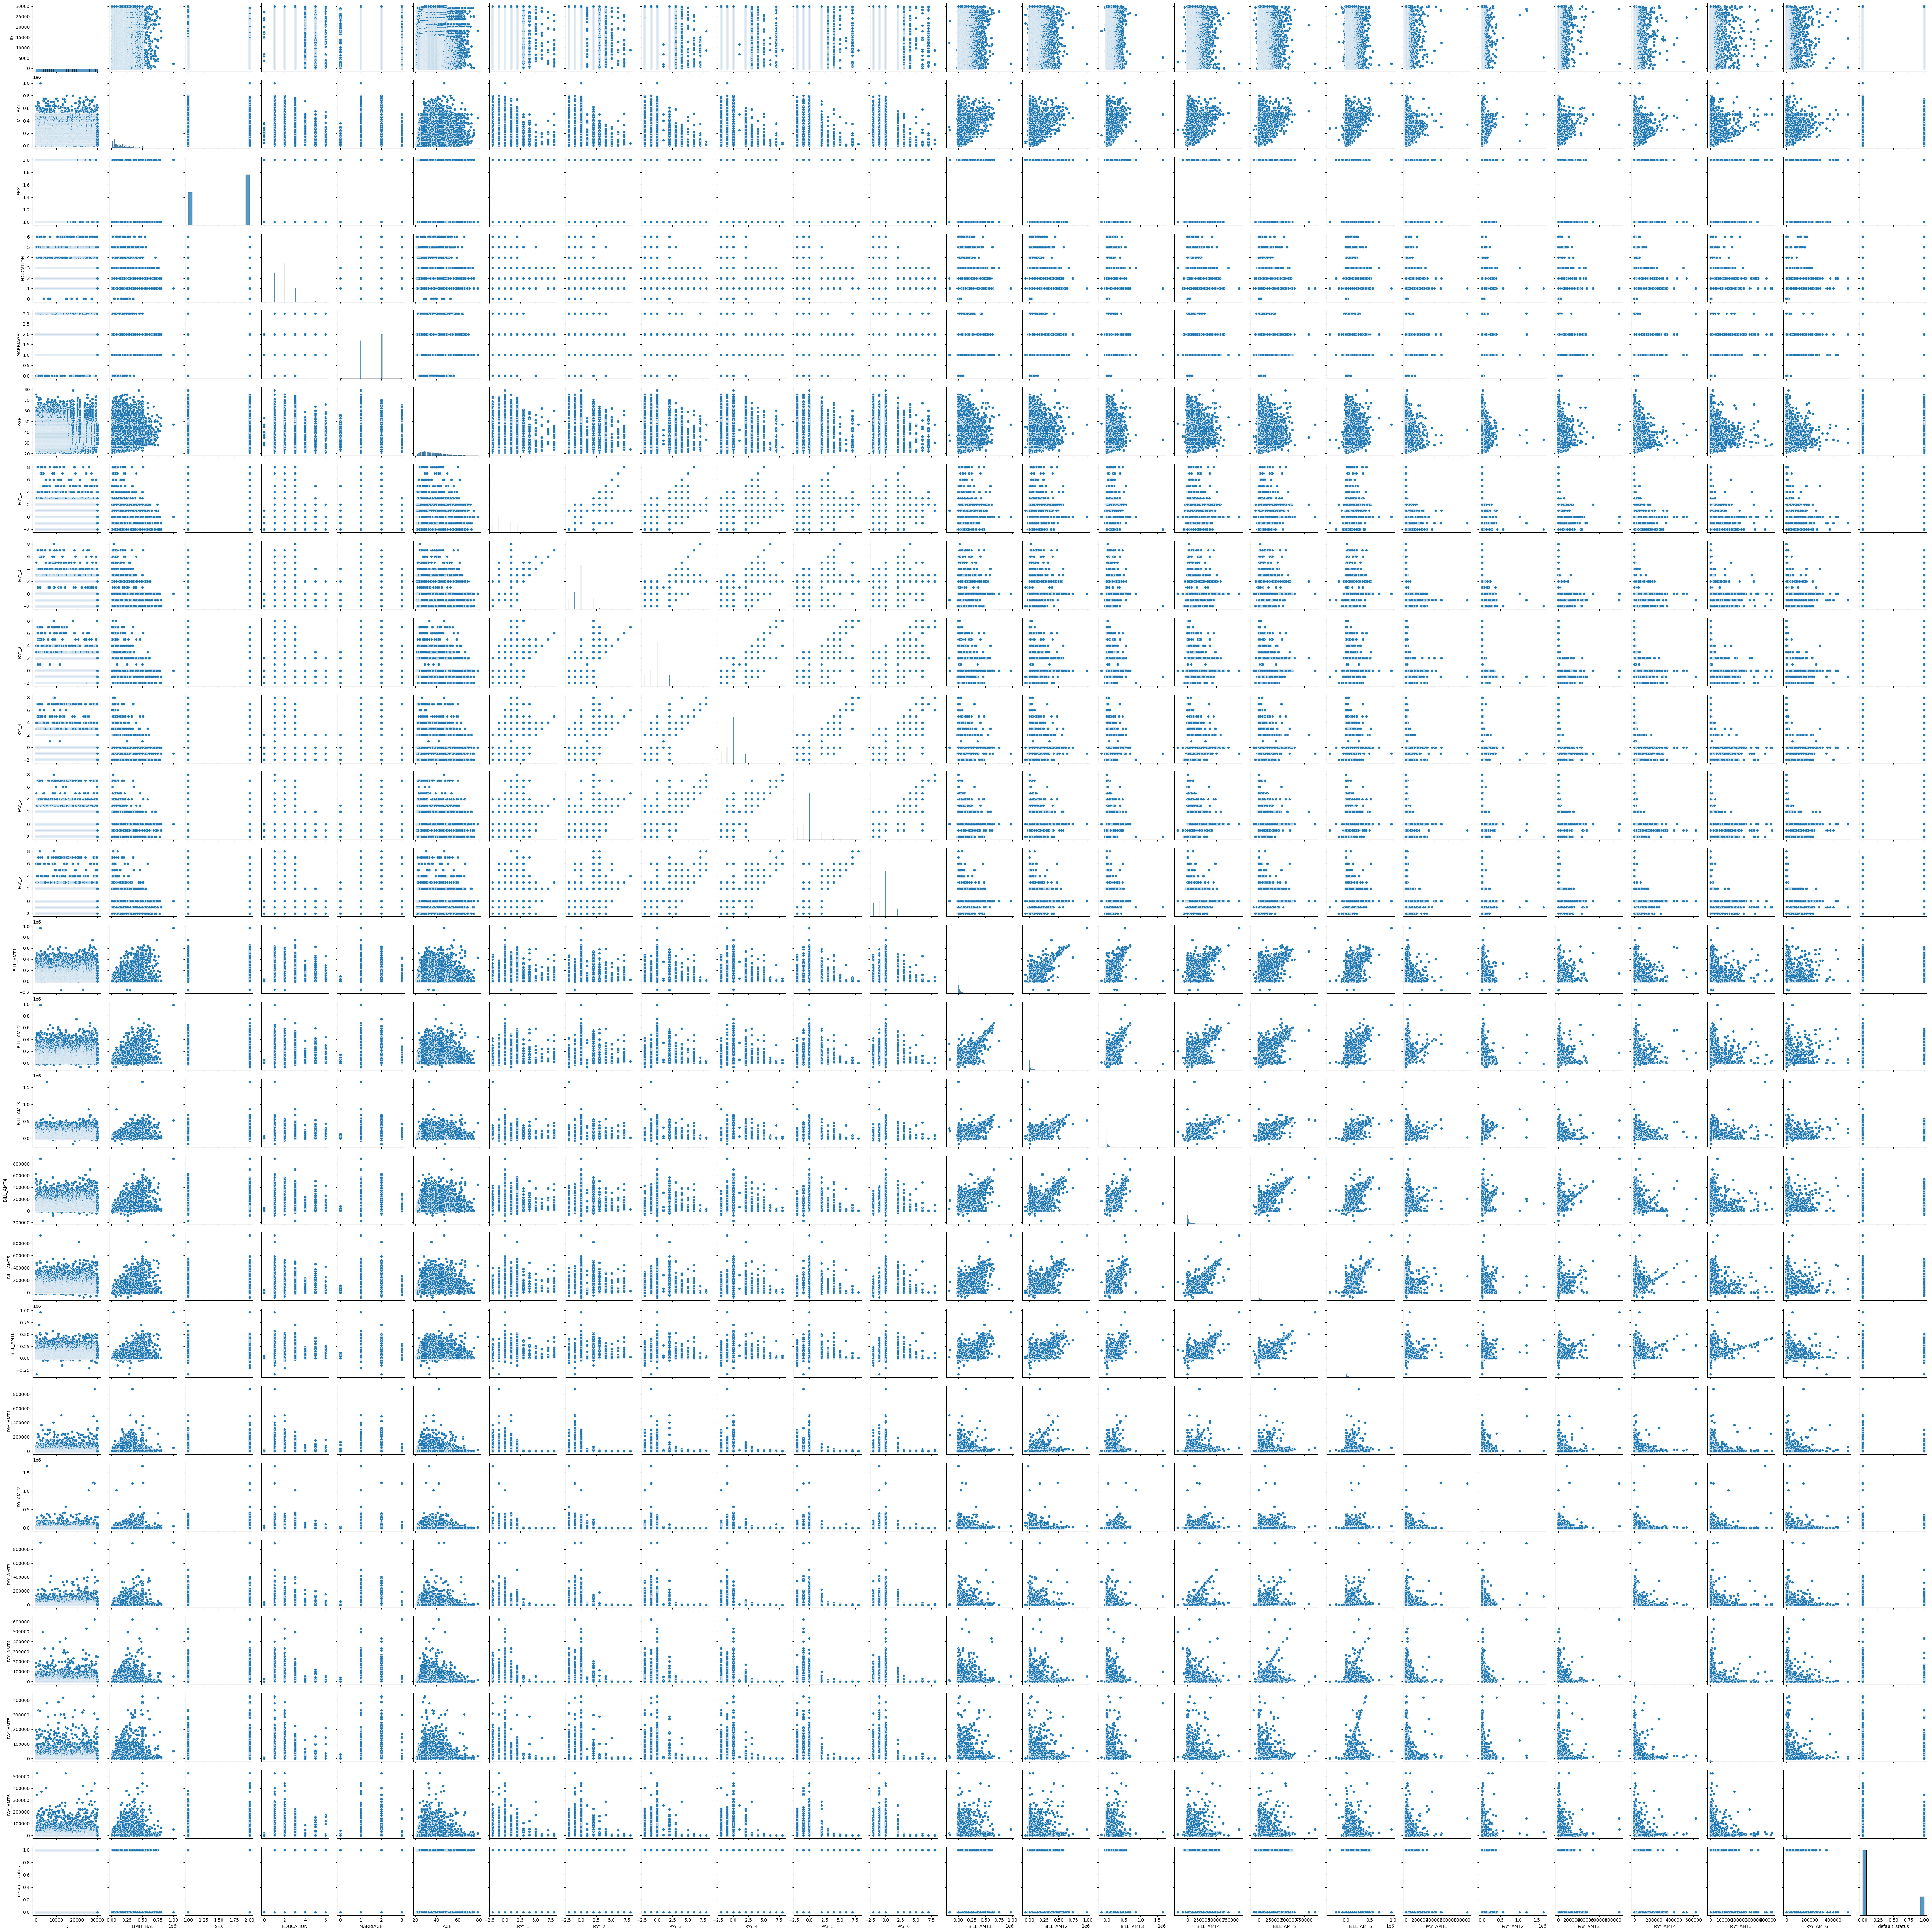

In [30]:
plt.figure(figsize=(30,30))
sns.pairplot(data=df)

- PAY_AMT and AGE i associated with some kind or no kind of distribution at all
- Features of the data are correlated or never correlated at all in the pairplot 
- Some relation among BILL_AMT and PAY_AMT has a regression fit line and skewed 
- AGE with PAY_AMT and BILL_AMT follows normal distribution, and that was also evident in the bivariate plots mentioned above 

In [31]:
# df.drop("ID", axis=1, inplace=True)

In [32]:
# def corr_matrix(df,threshold):
#     col_corr = set()
#     corr_matrix = df.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j])>threshold:
#                 colname = corr_matrix.columns[i]
#                 col_cor.add(colname)
#     return col_corr               

In [33]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_status  
0           0.0       0.0       0.0       0.0               1  
1        1000.0    1000.0       0.0    2000.0               1  
2        1000.0    1000.0    1000.0    5000.0               0  
3        1200.0    1100.0    1069.0    1000.0               0  
4       10000.0    9000.0     689.0     679.0               0  
...         ...       ...       ...       ...             ...  
29995    5003.0    3047.0    5000.0    1000.0               0  
29996    8998.0     129.0       0.0       0.0               0  
29997   22000.0    4200.0    2000.0    3100.0               1  
29998    1178.0    1926.0   52964.0    1804.0               1  
29999    1430.0    1000.0    1000.0    1000.0               1  

[30000 rows x 25 columns]

In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the Dataset

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35, random_state=10)
logging.info('split the dataset')

# Support Vector Classification

- We aren't scaling data for SVC even though we have to since we will be trying out Decision tree, and other boosting and bagging methods which won't require feature scaling

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# scaler = StandardScaler()
# scaler.fit_transform(X_train)
# scaler.transform(X_test)


model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

print("Training accuracy :", model_svc.score(X_train, y_train))
print("Testing accuarcy :", model_svc.score(X_test, y_test))

cr = classification_report(y_test, y_pred)
print(cr)

roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)    

print(accuracy_score(y_test,y_pred))
logging.info('SVC model')

Training accuracy : 0.7815384615384615
Testing accuarcy : 0.7746666666666666
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      8134
           1       0.00      0.00      0.00      2366

    accuracy                           0.77     10500
   macro avg       0.39      0.50      0.44     10500
weighted avg       0.60      0.77      0.68     10500

0.5
0.7746666666666666


# Hyper parameter tuning SVC

In [38]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[1, 30]} #gave the default parameters 
# grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)
# grid.fit(X_train, y_train)

# print(grid.best_params_)

# print(grid.best_estimator_)

# grid_predictions = grid.predict(X_test)

# print(classification_report(y_test, grid_predictions))

# print(accuracy_score(y_test,y_pred))

#  Decision tree classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print("Training accuracy :", model_dt.score(X_train, y_train))
print("Testing accuarcy :", model_dt.score(X_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

print(accuracy_score(y_test,y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)    
logging.info('tried decision tree')

Training accuracy : 1.0
Testing accuarcy : 0.7184761904761905
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8134
           1       0.38      0.41      0.40      2366

    accuracy                           0.72     10500
   macro avg       0.60      0.61      0.61     10500
weighted avg       0.73      0.72      0.72     10500

0.7184761904761905
0.6087938276472634


# Post Pruning the Decision tree

In [40]:
# dt_hyp = DecisionTreeClassifier(random_state=50)
# dt_hyp.fit(X_train,y_train)

# path = dt_hyp.sost_complexity_pruning_path(X_train,y_train)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities

# dt_hyps = []

# for ccp_alpha in ccp_alphas:
#     dt_hyp = DecisionTreeClassifier(random_state=50, ccp_alpha=ccp_alpha)
#     dt_hyp.fit(X_train,y_train)
#     dt_hyps.append(dt_hyp)
    
# dt_hyps = dt_hyps[::-1]

# train_scores = [roc_auc_score(y_train,clf.predict(X_train)) for dt_hyp in dt_hyps]
# test_scores = [roc_auc_score(y_test, clf.predict(X_test)) for dt_hype in dt_hyps]

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 400, max_depth = 10)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print("Training accuracy :", model_rf.score(X_train, y_train))
print("Testing accuarcy :", model_rf.score(X_test, y_test))
cr = classification_report(y_test, y_pred)
print(cr)
logging.info('tried RF')

Training accuracy : 0.8608717948717949
Testing accuarcy : 0.8188571428571428
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8134
           1       0.69      0.35      0.47      2366

    accuracy                           0.82     10500
   macro avg       0.76      0.65      0.68     10500
weighted avg       0.80      0.82      0.80     10500



# XGBoost
We use Boosting methods like XgBoost and gradient Boost classifier in the upcoming implementations

In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
model_xgb.fit(X_train, y_train)
# make predictions
preds = model_xgb.predict(X_test)

print("Training accuracy :", model_xgb.score(X_train, y_train))
print("Testing accuarcy :", model_xgb.score(X_test, y_test))
cr = classification_report(y_test, y_pred)
print(cr)
logging.info('tried XGB')

Training accuracy : 0.8222564102564103
Testing accuarcy : 0.818952380952381
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8134
           1       0.69      0.35      0.47      2366

    accuracy                           0.82     10500
   macro avg       0.76      0.65      0.68     10500
weighted avg       0.80      0.82      0.80     10500



# Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
model_gbc.fit(X_train,y_train)
pred=model_gbc.predict(X_test)

print("Training accuracy :", model_gbc.score(X_train, y_train))
print("Testing accuarcy :", model_gbc.score(X_test, y_test))

cr = classification_report(y_test, y_pred)
print(cr)
logging.info('tried GBC')

Training accuracy : 0.8326153846153846
Testing accuarcy : 0.8191428571428572
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      8134
           1       0.69      0.35      0.47      2366

    accuracy                           0.82     10500
   macro avg       0.76      0.65      0.68     10500
weighted avg       0.80      0.82      0.80     10500



In [50]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [45]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pickle

In [47]:
pickle.dump(model_rf, open('credit_card_default_rf_final.pkl','wb'))
logging.info('model saved')